## Setup

In [1]:
!pip install poetry

In [2]:
!pip install https://github.com/parulsethi/SMorph/releases/download/0.1.0/SMorph-0.1.0.tar.gz

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
import smorph as sm
import pandas as pd
pd.set_option('display.max_rows', None)

In [5]:
# color to be used for each group
color_dict = {0: 'green', 1: 'red'}

# group labels
labels = {0: 'ca1', 1: 'ca1c'}

# marker for each group to be used in PCA plot
markers = {0: 'o', 1: '^'}

In [6]:
# List all feature names
sm.core._groups._ALL_FEATURE_NAMES

('surface_area',
 'total_length',
 'avg_process_thickness',
 'convex_hull',
 'no_of_forks',
 'no_of_primary_branches',
 'no_of_secondary_branches',
 'no_of_tertiary_branches',
 'no_of_quatenary_branches',
 'no_of_terminal_branches',
 'avg_length_of_primary_branches',
 'avg_length_of_secondary_branches',
 'avg_length_of_tertiary_branches',
 'avg_length_of_quatenary_branches',
 'avg_length_of_terminal_branches',
 'critical_radius',
 'critical_value',
 'enclosing_radius',
 'ramification_index',
 'skewness',
 'coefficient_of_determination',
 'sholl_regression_coefficient',
 'regression_intercept')

## Start group analysis

In [7]:
# input the path to individual group folders (place them in SMorph)
groups_folders = ['autocropped/C1-M1_LEFT_CA1_MIP', 'autocropped/SW 1SEC2 CA1 A CONTRA_MIP']

In [8]:
cells = sm.Groups(groups_folders, 'confocal', 'auto', labels, save_features=False, shell_step_size=3)

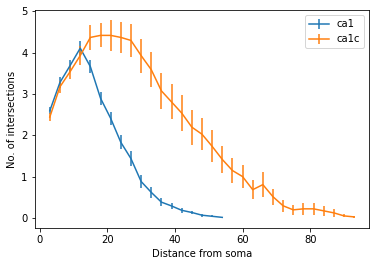

In [9]:
cells.plot_avg_sholl_plot(False)

In [10]:
pca_features = list(sm.core._groups._ALL_FEATURE_NAMES)
pca_features.remove('avg_process_thickness')
pca_features.remove('total_length')
pca_features.remove('ramification_index')

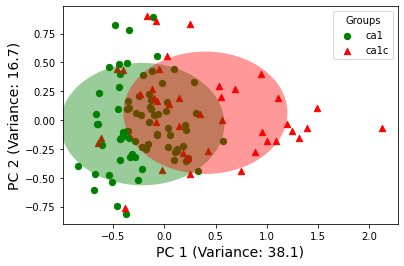

array([0.3806043 , 0.16654269, 0.12298673])

In [11]:
cells.pca(n_PC=3, color_dict=color_dict, markers=markers, save_results=True, on_features=pca_features)

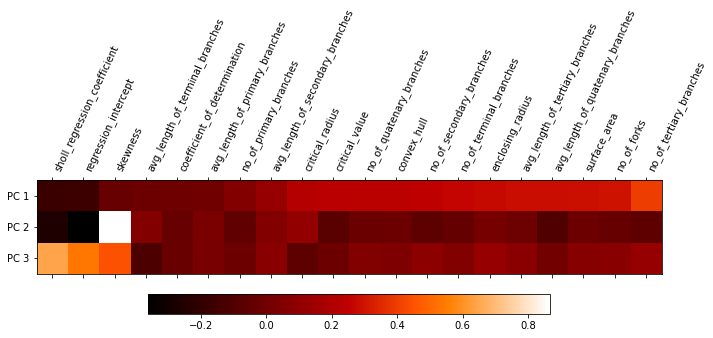

In [12]:
cells.plot_feature_significance_heatmap()

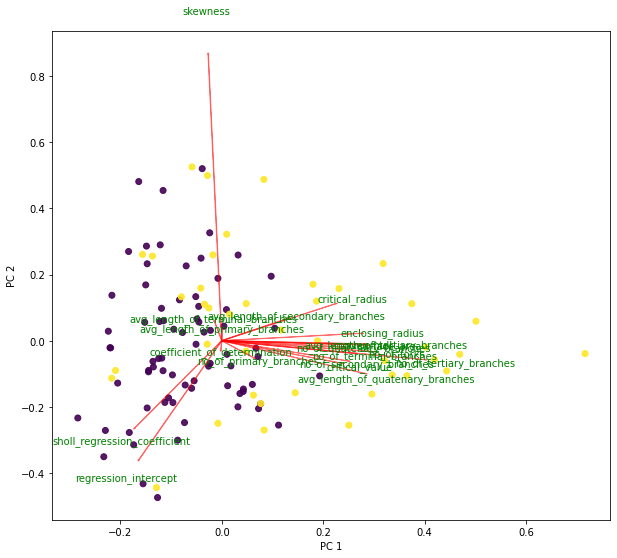

In [13]:
cells.plot_feature_significance_vectors()

k = 4 clusters (0, ..., 4) with Variance Ratio = 120.28237495476091
seed = 83
Using principal components
Cluster distribution in groups:
- ca1 has 28 cells in Cluster 0, 25 cells in Cluster 1, 23 cells in Cluster 2, 
- ca1c has 14 cells in Cluster 0, 13 cells in Cluster 1, 11 cells in Cluster 2, 3 cells in Cluster 3. 


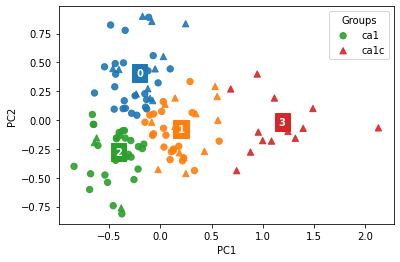

In [14]:
cluster_centers, clustered_data = cells.get_clusters(k=None, use_features=False, n_PC=2, plot='scatter')

In [15]:
cluster_centers

,PC 1,PC 2,cluster
0,-0.234295,0.381668,0
1,0.166898,-0.103179,1
2,-0.444418,-0.302720,2
3,1.157372,-0.045807,3


## Individual histograms

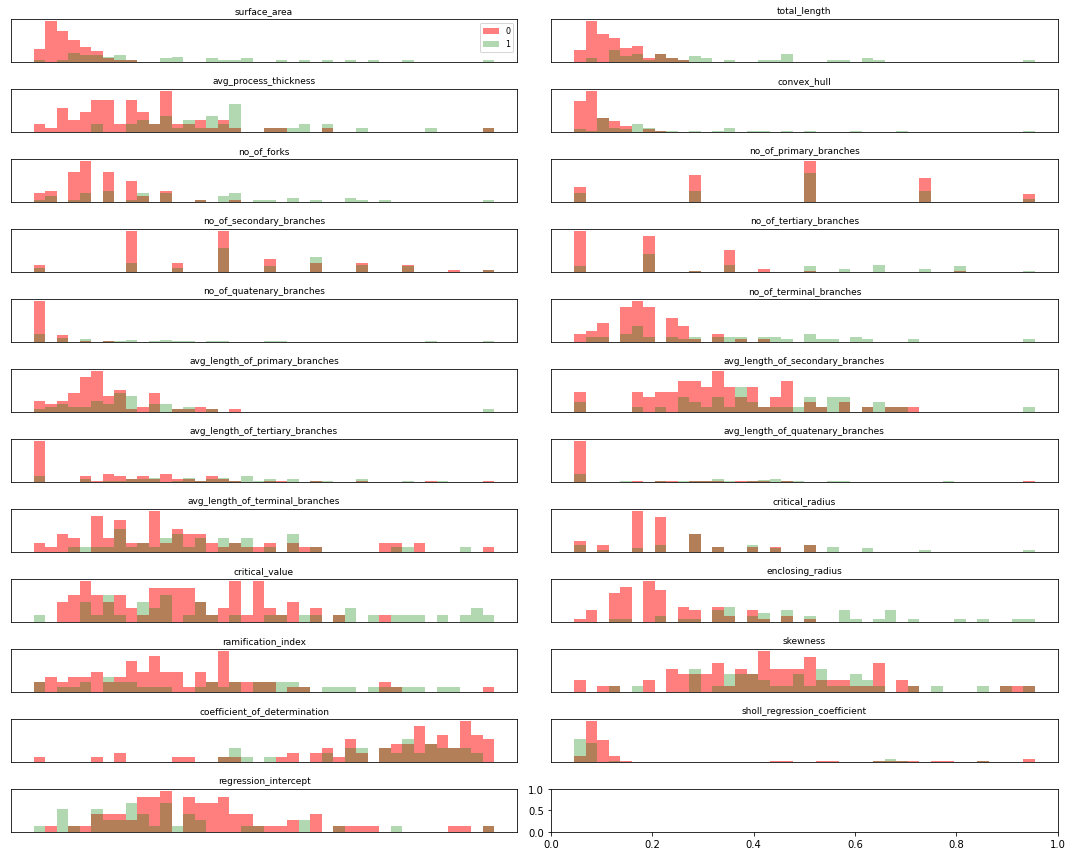

In [16]:
cells.plot_feature_histograms()